# Detection of ArUco Markers

https://docs.opencv.org/4.x/d5/dae/tutorial_aruco_detection.html

In [74]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

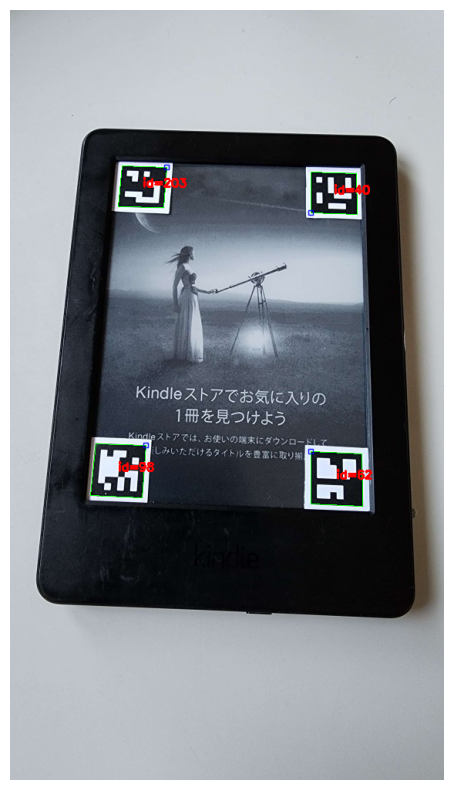

In [111]:
# Load image
image_frame = cv.imread("../Images/markers2.jpg")

# Convert colors
image_frame = cv.cvtColor(image_frame, cv.COLOR_BGR2RGB)

# Create ArUco detector 
dictionary = cv.aruco.getPredefinedDictionary(cv.aruco.DICT_6X6_250)
parameters =  cv.aruco.DetectorParameters()

# ArUco parameters
parameters.adaptiveThreshWinSizeMin = 10 
parameters.polygonalApproxAccuracyRate = 0.005 

detector = cv.aruco.ArucoDetector(dictionary, parameters)

# Detect markers
marker_corners, marker_ids, rejected_candidates = detector.detectMarkers(image_frame)

# Draw markers
cv.aruco.drawDetectedMarkers(image_frame, marker_corners, marker_ids)

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image_frame)
plt.show()

## Pose estimation

In [10]:
# Calculate pose for each marker
for i, _ in enumerate(marker_corners):
    cv.solvePnP(objPoints, marker_corners[i], cameraMatrix, distanceCoefficients, rvecs.at(i), tvecs.at(i));

cv.aruco.draw

AttributeError: module 'cv2.aruco' has no attribute 'draw'

## Super-imposing image

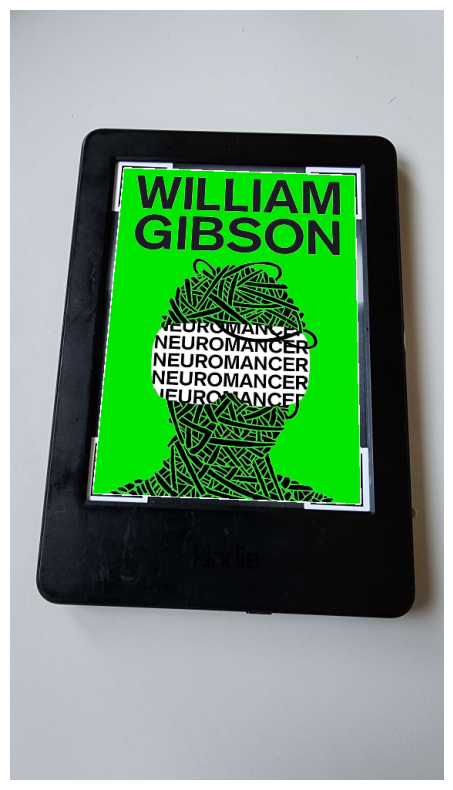

In [155]:
image_cover = cv.imread("../Images/cover.jpg")
image_frame = cv.imread("../Images/markers2.jpg")

# Convert colors
image_frame = cv.cvtColor(image_frame, cv.COLOR_BGR2RGB)

points_source = np.array([
    (0, 0),      # Top left
    (667, 0),    # Top right
    (667, 1000), # Bottom right
    (0, 1000)    # Bottom left
])

points_target = np.array([
    marker_corners[3][0][3],
    marker_corners[2][0][2],
    marker_corners[0][0][2],
    marker_corners[1][0][2]
])

# Calculate homography
homography_matrix, status = cv.findHomography(points_source, points_target)

# Warp source image to destination based on homography
warped_image = cv.warpPerspective(image_cover, homography_matrix, (image_frame.shape[1], image_frame.shape[0]))

# # Prepare a mask representing region to copy from the warped image into the original frame.
mask = np.zeros([image_frame.shape[0], image_frame.shape[1]], dtype=np.uint8);
cv.fillConvexPoly(mask, np.int32([points_target]), (255, 255, 255), cv.LINE_AA);

# Erode the mask to not copy the boundary effects from the warping
element = cv.getStructuringElement(cv.MORPH_RECT, (3, 3));
mask = cv.erode(mask, element, iterations=3);

# Copy the mask into 3 channels.
mask3 = np.zeros_like(warped_image) 

for i in range(0, 3):
    mask3[:,:,i] = mask * 255

# Copy the masked warped image into the original frame in the mask region
warped_image_masked = cv.multiply(warped_image, mask3)
frame_masked = cv.multiply(image_frame, 1 - mask3)
im_out = cv.add(warped_image_masked, frame_masked)

plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(im_out)
plt.show()